# Facial Expression Recognition - Using FER2013 Database
**Author**: Christopher Holzweber

**Institution**: Johannes Kepler Universität Linz - Institute of Computational Perception

**Intention**: Bachelorthesis - Prototype for FER

**Description**: 
In this Notebook File a CNN Model is trained using the FERG Dataset. Here one strategy was used:

# Training Model from Scratch with original Data

This CNN Architekture is based on the paper

Facial Emotion Recognition Using Deep Convolutional Neural Network by 

Pranav E.
School of Engineering
Cochin University of Science
and Technology
Kochi, India

Suraj Kamal
Department of Electronics
Cochin University of Science and
Technology
Kochi, India

Satheesh Chandran C.
Department of Electronics
Cochin University of Science and
Technology
Kochi, India

Supriya M.H.
Department of Electronics
Cochin University of Science
and Technology
Kochi, India

Latest Results: loss: 1.1655 - accuracy: 1.0000 - val_loss: 1.1654 - val_accuracy: 1.0000


In [12]:
# %tensorflow_version 2.x  # making sure using version 2 of tensorflow
import tensorflow as tf  # import tensorflow module
import numpy as np # standard lib. for calculations
import cv2  # library for imagehandling 
import matplotlib.pyplot as plt  # plotting images
import os  # for file handling and loading
import pandas as pd
import random # for datashuffling
from sklearn.metrics import confusion_matrix # for evaluationg the CNN Model
from sklearn.model_selection import train_test_split
import seaborn as sn # pi install seaborn - used for plotting confusion matrix

# Dataset
For this project the dataset FERG is used

http://grail.cs.washington.edu/projects/deepexpr/ferg-2d-db.html

The data needs to be seperated manually into a training and testing set (75:25)

The FERG classifies facial emotions into 7 Categories:

(0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral)

**Define Classes and Data/Label Arrays**

In [13]:
emotion_classes = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
train_data = [] # picture data for model training
train_label = [] # labels of training data
test_data = [] # picture data for model testing
test_label = []  # labels of testing data

**Read all  Images from subfolders and return (data , label) tuples from the dataset**

In [14]:
def readData(direction,nrsubfolders):
    dataframe = []
    traindir = direction
    for outer in os.listdir(traindir):
        path = os.path.join(traindir,str(outer+'/'))  # Iterate over every subfolder
        for cs in range(0, nrsubfolders):
            path2 = os.path.join(path,str(cs)+str('/'))  # Iterate over every subfolder
            for img in os.listdir(path2):
                imgpath = os.path.join(path2,img)
                tempImg = cv2.imread(imgpath,1)  # load image 0 for greyscale
                tempImg = cv2.resize(tempImg, (100, 100))
                dataframe.append([tempImg,cs])
    return dataframe

**Get all training and test images and shuffle them**

In [15]:
tempdata = readData("./FERG_DB_256/data/",7) # read training data
random.shuffle(tempdata) #shuffle data
#store data in according arrays
for feat,label in tempdata:
    train_data.append(feat)
    train_label.append(label)

# create arrays out of lists
train_data = np.array(train_data)
train_label = np.array(train_label)



**Seperate the loaded Dataset into a Testing and Traingset**

In [16]:
train_data, test_data, train_label, test_label = train_test_split(train_data, train_label)

In [17]:
# normalize datavalues for machinelearning - best practice that values are between [0, 1]
train_data, test_data = train_data / 255.0, test_data / 255.0

# SetUp CNN Architecture

In [18]:
from tensorflow.keras import layers, models  # use models and layers given by tensorflow framework

In [18]:
# Model Skeleton reused form the Paper Facial Emotion Recognition Using Deep Convolutional Neural Network
model2020 = models.Sequential()
model2020.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(100,100, 3)))
model2020.add(layers.MaxPooling2D((2, 2)))
model2020.add(layers.Dropout(.01))
model2020.add(layers.Conv2D(32, (3,3), activation='relu'))
model2020.add(layers.MaxPooling2D((2, 2)))
model2020.add(layers.Dropout(.01))
model2020.add(layers.Conv2D(32, (3, 3), activation='relu'))
model2020.add(layers.MaxPooling2D((2, 2)))
model2020.add(layers.Dropout(.01))
model2020.add(layers.Flatten())
model2020.add(layers.Dense(256, activation='relu'))
model2020.add(layers.Dense(7, activation = 'softmax'))
model2020.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 32)       

# *Training Area*

In [20]:
model2020.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model2020.fit(train_data, train_label, epochs=7, 
                    validation_data=(test_data, test_label))

Epoch 1/7
1307/1307 [==============================] - 361s 276ms/step - loss: 1.1666 - accuracy: 0.9989 - val_loss: 1.1655 - val_accuracy: 0.9999
Epoch 2/7
1307/1307 [==============================] - 357s 273ms/step - loss: 1.1688 - accuracy: 0.9968 - val_loss: 1.1655 - val_accuracy: 0.9999
Epoch 3/7
1307/1307 [==============================] - 358s 274ms/step - loss: 1.1688 - accuracy: 0.9966 - val_loss: 1.1885 - val_accuracy: 0.9769
Epoch 4/7
1307/1307 [==============================] - 360s 276ms/step - loss: 1.1681 - accuracy: 0.9973 - val_loss: 1.1654 - val_accuracy: 1.0000
Epoch 5/7
1307/1307 [==============================] - 357s 274ms/step - loss: 1.1654 - accuracy: 1.0000 - val_loss: 1.1654 - val_accuracy: 1.0000
Epoch 6/7
1307/1307 [==============================] - 356s 272ms/step - loss: 1.1654 - accuracy: 1.0000 - val_loss: 1.1654 - val_accuracy: 1.0000
Epoch 7/7
1307/1307 [==============================] - 355s 271ms/step - loss: 1.1655 - accuracy: 1.0000 - val_loss: 1

In [21]:
model2020.save('model2020_FERG256_100px.h5')

# *Testing and Validation Area*

In [ ]:
acc = history.history['accuracy']

In [8]:
loaded_model = tf.keras.models.load_model("./SavedModels/model2020_FERG256_100px.h5")

In [ ]:
test_loss, test_acc = model2020.evaluate(test_data, test_label, verbose=2)

In [ ]:
temp = [] # reshape testdata, becuase predict function needs 4 dimensions
temp.append(test_data[4500])
temp = np.array(temp)
temp.shape
plt.imshow(test_data[4500])

In [ ]:
## Create Confusion Matrix of learn model

In [19]:
def getConfusionMatrix(model):
    predicted = model.predict(test_data) #prediction vektor of the loaded test_data
    y_pred = []
    y_true = []
    for i in range(0, len(test_label)):
        y_true.append(emotion_classes[test_label[i]]) #create a vektor with emotion_labels
        y_pred.append(emotion_classes[np.argmax(predicted[i,:])])
    y_pred = np.array(y_pred) # cast both vektors to np. arrays as needed by the confusion_matrix function
    y_true = np.array(y_true)
    return confusion_matrix(y_true, y_pred, labels = emotion_classes, normalize='true')

In [20]:
def printConfusionMatrix(model):
    conmatrix = getConfusionMatrix(model)
    df_cm = pd.DataFrame(conmatrix, index = [i for i in emotion_classes],
                  columns = [i for i in emotion_classes])

    plt.figure(figsize = (10,7))
    sn.heatmap(df_cm, annot=True, cmap="YlGnBu")
    plt.title('Confusion Matrix of CNN Model')
    # Set x-axis label
    plt.xlabel('Predicted')
    # Set y-axis label
    plt.ylabel('Actual')

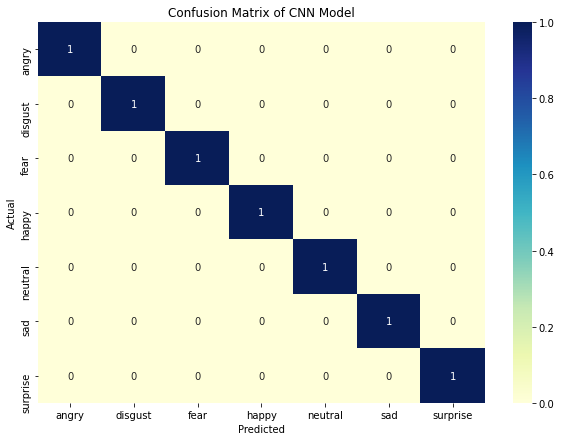

In [21]:
printConfusionMatrix(loaded_model)

# Test FERG256 Model on FER2013 trainingdataset

In [22]:
def readFER2013Data(direction,nrsubfolders):
    dataframe = []
    traindir = direction
    for cs in range(0, nrsubfolders+1):
        path = os.path.join(traindir,str(cs))  # Iterate over every subfolder
        for img in os.listdir(path):
            tempImg = cv2.imread(os.path.join(path,img),1)  # load image 0 for greyscale
            tempImg = cv2.resize(tempImg, (100, 100))
            dataframe.append([tempImg,cs])
    return dataframe

In [24]:
fer2013_data = []
fer2013_label = []
tempdata = readFER2013Data("./FER2013/train/",6) # read training data
random.shuffle(tempdata) #shuffle data
#store data in according arrays
for feat,label in tempdata:
    fer2013_data.append(feat)
    fer2013_label.append(label)
# create arrays out of lists
fer2013_data = np.array(fer2013_data)
test_label = np.array(fer2013_label)
test_data = fer2013_data / 255.0

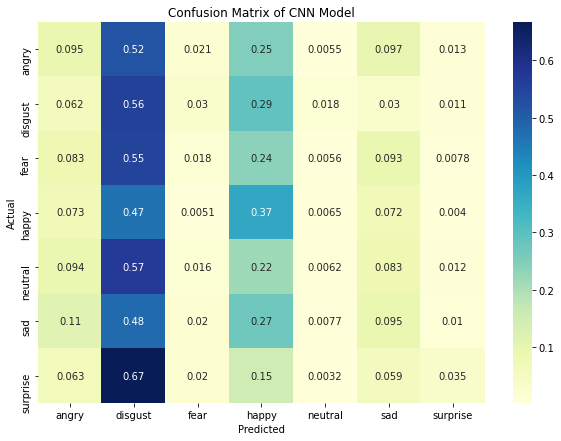

In [25]:
printConfusionMatrix(loaded_model)